In [2]:
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *
from analysis.line2 import *
from analysis.probedatTaskmodel import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
from tools.handtrack import HandTrack, getTrialsCameraFrametimes
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [46]:
def euclidean_distance(p1, p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )**0.5

In [63]:
def fivenum(x):
    series = pd.Series(x)
    mi = series.min()
    q1 = series.quantile(q=0.25, interpolation="nearest")
    me = series.median()
    q3 = series.quantile(q=0.75, interpolation="nearest")
    ma = series.max()
    return pd.Series([mi, q1, me, q3, ma], index=["min", "q1", "median", "q3", "max"])

In [50]:
ind1_vid = 4
ind1_ml2 = 1
animal = "Pancho"
date = '220317'
expt = 'chunkbyshape4'
sess = 1
sess_print=""

fd = loadSingleDataQuick(animal, date, expt, sess)
HT = HandTrack(ind1_vid, ind1_ml2, fd, date=date, expt=expt)
HT.load_campy_data(1, sess=sess_print)
trials_no_ts_data = []
trange = range(4,17)

/home/danhan/freiwaldDrive/ltian/backup/gorilla/gorilla1/animals/Pancho/220317/220317_*_chunkbyshape4_Pancho_1.pkl
/home/danhan/freiwaldDrive/ltian/backup/gorilla/gorilla1/animals/Pancho/220317/220317_*_chunkbyshape4_Pancho_1.pkl
-- loaded presaved data: /home/danhan/freiwaldDrive/ltian/backup/gorilla/gorilla1/animals/Pancho/220317/220317_155211_chunkbyshape4_Pancho_1.pkl


In [79]:
delta_df = pd.DataFrame(columns = ["trial","t1","t2","displacement", "velocity"])
for trial in trange:
    
    dat, _ = HT.process_data_singletrial(trial, ploton=False)
    
    if dat == {}:
        continue
    
    strokes_cam_all = []
    strokes_touch_all = []
    for strok_cam in dat["strokes_cam"]:
        strokes_cam_all.append(np.array(strok_cam))
    for strok in strokes_cam_all:
        strok=list(strok)
        for i,p in enumerate(strok[:-1]):
            next_p = strok[i+1]
            dist = euclidean_distance(p[0:2], next_p[0:2])
            delta_df.loc[-1] = [trial, p[3], next_p[3], dist, dist/0.02]
            delta_df.index=delta_df.index+1
            delta_df=delta_df.sort_index()
            

TODO: Get accurate frametime after pass in frame extraction to Buttons
Searching using this string:
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/extracted_dlc_data/*camera*trial_7-*dat**
Found this many paths:
4
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/extracted_dlc_data/camera_bfs1_-trial_7-dat.pkl
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/extracted_dlc_data/camera_bfs2_-trial_7-dat.pkl
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/extracted_dlc_data/camera_ffly_-trial_7-dat.pkl
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/extracted_dlc_data/camera_flea_-trial_7-dat.pkl
500.0
TODO: Get accurate frametime after pass in frame extraction to Buttons
Searching using this string:
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/extracted_dlc_data/*camera*trial_8-*dat**
Found this many paths:
4
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/extracted_dlc_data/camera_bfs1_-trial_8-dat.pkl
---
/data3/hand

In [80]:
delta_df.head(5)

,trial,t1,t2,displacement,velocity
0,16.0,3.908,3.928,0.002337,0.116835
1,16.0,3.888,3.908,0.002495,0.124772
2,16.0,3.868,3.888,0.002765,0.138272
3,16.0,3.848,3.868,0.003121,0.156029
4,16.0,3.828,3.848,0.002078,0.103923


min       4.509946e-07
q1        3.945361e-04
median    2.093649e-03
q3        3.014931e-03
max       2.154443e-02
dtype: float64


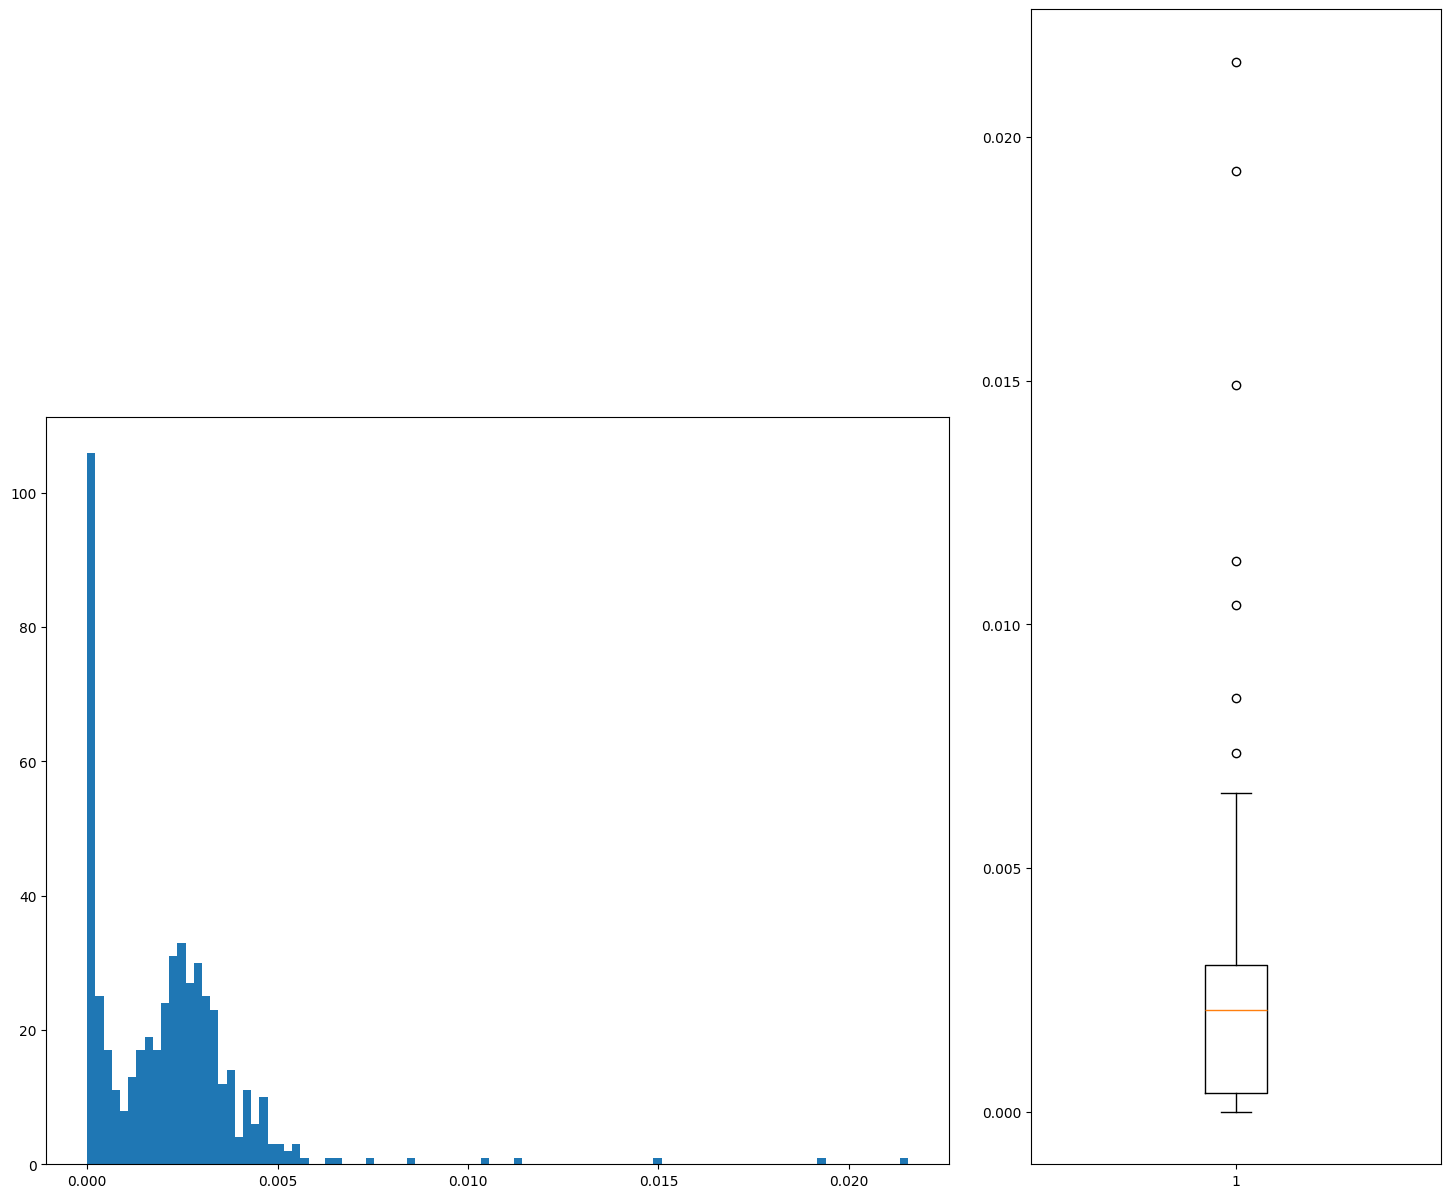

In [89]:
plt.figure(figsize=(18,15))
d_hist = v_hist = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
box = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)
d_hist.hist(delta_df["displacement"],100);
print(fivenum(delta_df["displacement"]))
box.boxplot(delta_df["displacement"]);
plt.show()



In [ ]:
mean = sum(delta_df["displacement"])/len(delta_df["dispalcement"])
variance = sum([((x - mean) ** 2) for x in delta_df["displacement"]) / len(delta_df["dispalcement"])
sd = variance ** 0.5
tol = 2
disp_limit = mean + tol*sd

stroke_cam_smooth = stroke_cam_all

delta_df.reset_index()
for index, row in delta_df.iterrows():
    if row["displacement"] > disp_limit:
        
    

In [7]:
beh = np.load("/home/danhan/freiwaldDrive/ltian/backup/gorilla/gorilla1/animals/Pancho/221101/221101_151509_dirshapecolor3_Pancho_1.pkl", allow_pickle = True)
print(type(beh))

<class 'dict'>


In [13]:
df = pd.DataFrame(data = beh)
df.head(50)

,TrialRecord,MLConfig,params,trials
CurrentTrialNumber,[[250.0]],NaN,NaN,NaN
CurrentTrialWithinBlock,[[4.0]],NaN,NaN,NaN
CurrentCondition,[[1.0]],NaN,NaN,NaN
CurrentBlock,[[32.0]],NaN,NaN,NaN
CurrentBlockCount,[[87.0]],NaN,NaN,NaN
CurrentConditionInfo,[],NaN,NaN,NaN
CurrentConditionStimulusInfo,"{'ID': [[203826.0]], 'Modality': [[1.0]], 'Sta...",NaN,NaN,NaN
ConditionsPlayed,"[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1....",NaN,NaN,NaN
ConditionsThisBlock,[],NaN,NaN,NaN
BlocksPlayed,"[[24.0], [24.0], [24.0], [24.0], [24.0], [24.0...",NaN,NaN,NaN
